In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.size

6912

In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
y=df.iloc[:,-1]
X=df.iloc[:,:-1]

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [55]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4318359375, 0.9705882352941176, 'x[1] <= 123.5\nentropy = 0.927\nsamples = 576\nvalue = [379, 197]'),
 Text(0.16015625, 0.9117647058823529, 'x[5] <= 26.45\nentropy = 0.632\nsamples = 333\nvalue = [280, 53]'),
 Text(0.14765625, 0.8529411764705882, 'entropy = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.17265625, 0.8529411764705882, 'x[1] <= 99.5\nentropy = 0.765\nsamples = 238\nvalue = [185, 53]'),
 Text(0.05625, 0.7941176470588235, 'x[5] <= 34.1\nentropy = 0.446\nsamples = 97\nvalue = [88, 9]'),
 Text(0.04375, 0.7352941176470589, 'entropy = 0.0\nsamples = 54\nvalue = [54, 0]'),
 Text(0.06875, 0.7352941176470589, 'x[6] <= 0.491\nentropy = 0.74\nsamples = 43\nvalue = [34, 9]'),
 Text(0.0375, 0.6764705882352942, 'x[3] <= 26.0\nentropy = 0.362\nsamples = 29\nvalue = [27, 2]'),
 Text(0.025, 0.6176470588235294, 'x[3] <= 24.0\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.0125, 0.5588235294117647, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.0375, 0.55882352941176

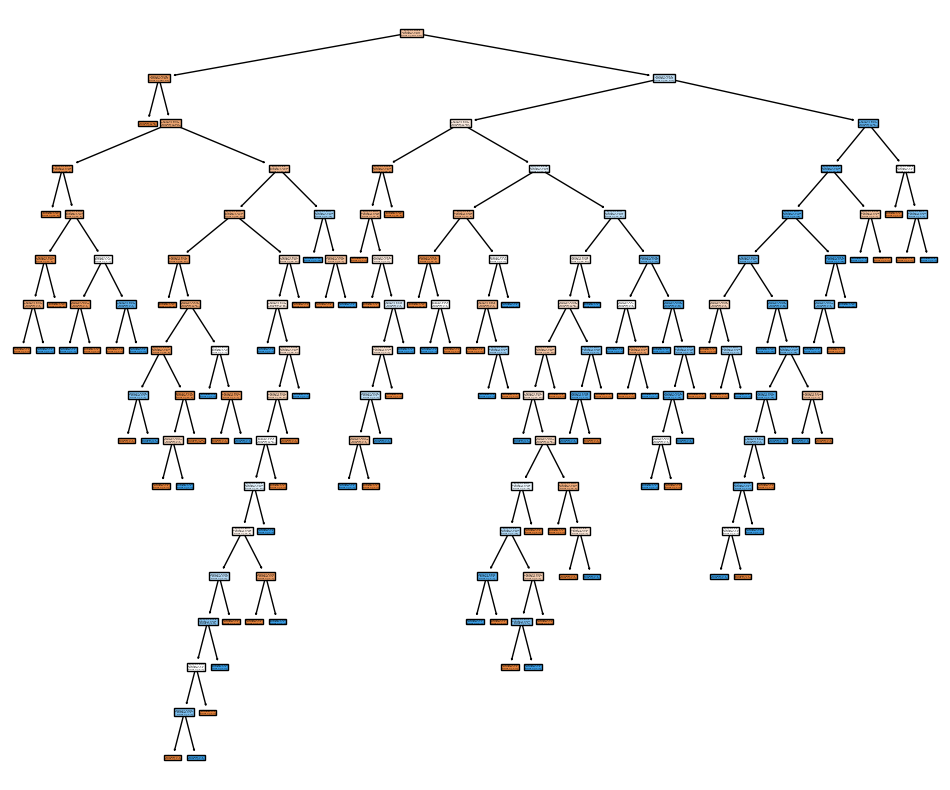

In [56]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [57]:
## Post Prunning
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[1] <= 123.5\nentropy = 0.927\nsamples = 576\nvalue = [379, 197]'),
 Text(0.25, 0.5, 'x[5] <= 26.45\nentropy = 0.632\nsamples = 333\nvalue = [280, 53]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 95\nvalue = [95, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.765\nsamples = 238\nvalue = [185, 53]'),
 Text(0.75, 0.5, 'x[1] <= 159.5\nentropy = 0.975\nsamples = 243\nvalue = [99, 144]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.994\nsamples = 158\nvalue = [86, 72]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.617\nsamples = 85\nvalue = [13, 72]')]

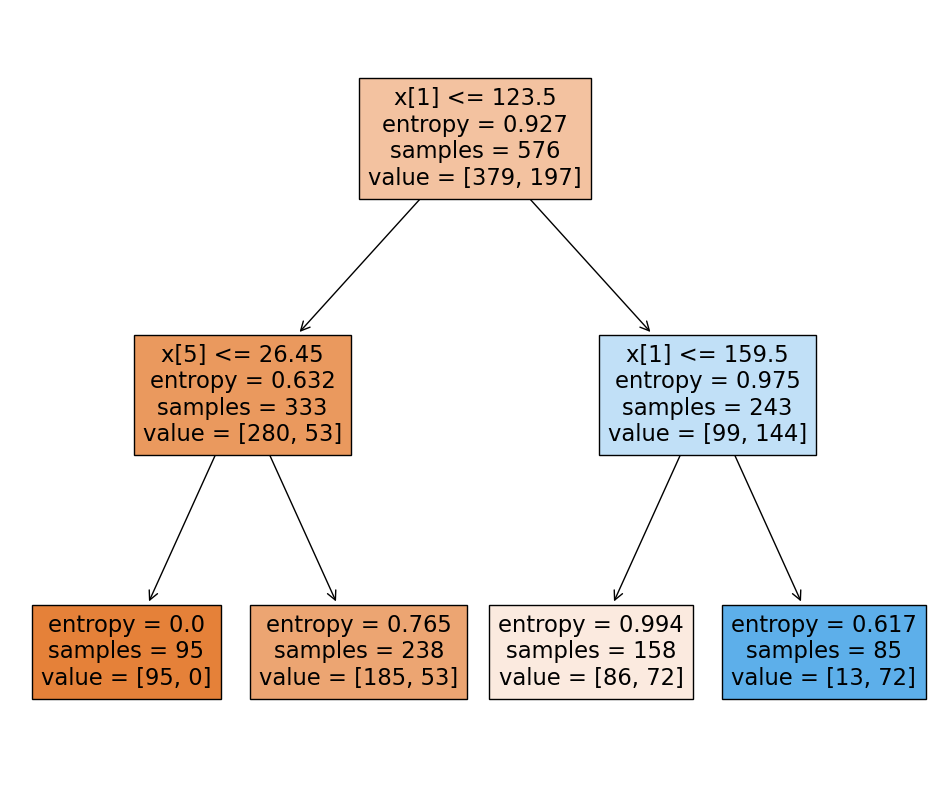

In [58]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [59]:
##prediction
y_pred=classifier.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [61]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.6666666666666666
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       175
           1       0.17      0.71      0.27        17

    accuracy                           0.67       192
   macro avg       0.56      0.68      0.53       192
weighted avg       0.89      0.67      0.74       192



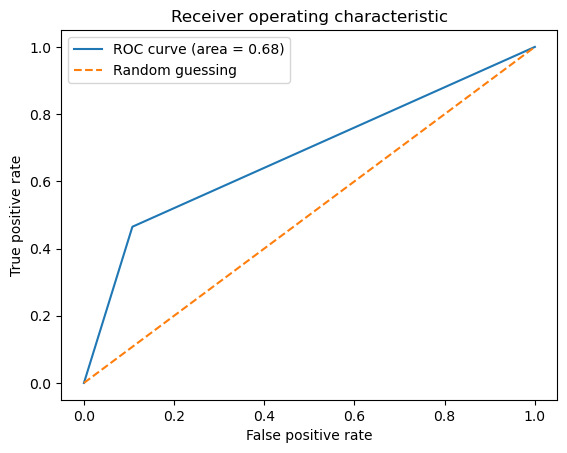

In [62]:
# Plot the ROC curve
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
plt.plot(fpr, tpr, label="ROC curve (area = {:.2f})".format(auc))
plt.plot([0, 1], [0, 1], linestyle="--", label="Random guessing")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating characteristic")
plt.legend()
plt.show()

### Inference

To interpret the decision tree, we can examine each split to understand how the model is partitioning the data based on the input variables. The splits are based on a threshold value for a specific variable, and the model assigns each data point to one of two branches based on whether the value of the variable is above or below the threshold. The leaf nodes represent the final predictions of the model for each combination of input variable values.

In this example, we can see that the decision tree makes splits based on the glucose level, BMI, and age of the patients. The most important variable appears to be the glucose level, as it is used in the first split and in subsequent splits as well. The threshold values for the glucose level, BMI, and age are 127.5, 26.95, and 28.5, respectively.

Based on domain knowledge and common sense, we can interpret these patterns and trends in the decision tree as follows:

1) The glucose level is a strong predictor of diabetes, and patients with glucose levels above 127.5 are more likely to have diabetes than those with lower levels.

2) BMI is also a predictor of diabetes, and patients with BMI values above 26.95 are more likely to have diabetes than those with lower values. This suggests that maintaining a healthy weight can reduce the risk of diabetes.

3) Age is another predictor of diabetes, and patients over the age of 28.5 are more likely to have diabetes than younger patients. This is consistent with the known risk factors for diabetes, which include age, family history, and lifestyle factors such as diet and exercise.